# Aula 1

In [ ]:
# features (1 sim, 0 não)
# pelo longo? 
# perna curta?
# faz auau?
porco1 = [0, 1, 0]
porco2 = [0, 1, 1]
porco3 = [1, 1, 0]

cachorro1 = [0, 1, 1]
cachorro2 = [1, 0, 1]
cachorro3 = [1, 1, 1]

# 1 => porco, 0 => cachorro
train_x = [porco1, porco2, porco3, cachorro1, cachorro2, cachorro3]
train_y = [1,1,1,0,0,0]

In [ ]:
from sklearn.svm import LinearSVC
model = LinearSVC()
model.fit(train_x, train_y)

In [ ]:
animal_misterioso = [1,1,1]
model.predict([animal_misterioso])

In [ ]:
misterio1 = [1,1,1]
misterio2 = [1,1,0]
misterio3 = [0,1,1]

test_x = [misterio1, misterio2, misterio3]
test_y = [0, 1, 1]

previsoes = model.predict(test_x)

In [ ]:
from sklearn.metrics import accuracy_score

taxa_de_acerto = model.score(test_x,test_y)
print("Taxa de acerto", taxa_de_acerto * 100)



# Aula 2

In [ ]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv"
dados = pd.read_csv(uri)

In [ ]:
x= dados[["home","how_it_works","contact"]] # Variáveis explicativas
y= dados[["bought"]] # Variável dependente

In [ ]:
from sklearn.model_selection import train_test_split
seed = 20
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=seed, stratify=y)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

modelo = LinearSVC()
modelo.fit(X_train, y_train)
previsoes = modelo.predict(X_test)

acuracia = accuracy_score(y_test, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

# Aula 3

In [ ]:
import pandas as pd 
uri= 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
dados = pd.read_csv(uri)
dados.head()

In [ ]:
a_renomear = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}
dados = dados.rename(columns = a_renomear)
dados.head()

In [ ]:
troca = {
    0 : 1,
    1 : 0
}
dados['finalizado'] = dados.nao_finalizado.map(troca)
dados.head()

In [ ]:
import seaborn as sns

sns.scatterplot(x="horas_esperadas", y="preco", hue="finalizado", data=dados)



In [ ]:
sns.relplot(x="horas_esperadas", y="preco", hue="finalizado", col="finalizado", data=dados)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np

SEED = 5
np.random.seed(SEED)
x = dados[['horas_esperadas','preco']]
y = dados[['finalizado']]

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(raw_treino_x), len(raw_teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = modelo.score(teste_x,teste_y) * 100
print("A acurácia foi %.2f%%" % acuracia)

In [ ]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='stratified')
dummy.fit(treino_x,treino_y)
acuracia = dummy.score(teste_x,teste_y) * 100
print("A acurácia do baseline foi %.2f%%" % acuracia)

# Aula 4

In [1]:
import pandas as pd
uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
dados = pd.read_csv(uri)
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np

SEED = 5
np.random.seed(SEED)
x = dados[['price','model_year','mileage_per_year']]
y = dados[['sold']]

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(raw_treino_x), len(raw_teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = modelo.score(teste_x,teste_y) * 100
print("A acurácia foi %.2f%%" % acuracia)

In [ ]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='stratified')
dummy.fit(treino_x,treino_y)
acuracia = dummy.score(teste_x,teste_y) * 100
print("A acurácia do baseline foi %.2f%%" % acuracia)

# Dicas

### Tarefa de classificação vs. regressão: Em uma tarefa de classificação, o objetivo é prever a classe de um exemplo, onde a classe é discreta e limitada a um número finito de categorias. Em uma tarefa de regressão, o objetivo é prever um valor contínuo ou uma função, onde o valor predito pode assumir qualquer valor em um intervalo contínuo.
### Por exemplo, se você tiver dados sobre os gastos de um cliente em uma loja e o objetivo for prever se esse cliente comprará um determinado produto ou não (classificação), então é uma tarefa de classificação. Se o objetivo for prever o valor total de vendas em uma loja com base em dados históricos de vendas (regressão), então é uma tarefa de regressão.

# Aula 5 - Decision tree

In [27]:
import pandas as pd
uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
dados = pd.read_csv(uri)
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
import numpy as np

SEED = 5
np.random.seed(SEED)
x = dados[['price','model_year','mileage_per_year']]
y = dados[['sold']]

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(raw_treino_x), len(raw_teste_x)))

modelo = DecisionTreeClassifier(max_depth=4)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = modelo.score(teste_x,teste_y) * 100
#print("A acurácia foi %.2f%%" % acuracia)
teste_x['Previsão'] = previsoes
teste_x['Resultado'] = teste_y
teste_x.head(20)

Treinaremos com 7500 elementos e testaremos com 2500 elementos


,price,model_year,mileage_per_year,Previsão,Resultado
756,83821.74,2002,13185,no,yes
4715,46327.89,1998,7615,yes,yes
8604,39847.04,2001,11801,yes,yes
8226,88881.87,2009,8620,no,no
4148,79948.35,2003,11005,no,yes
3204,112277.88,2003,8647,yes,no
529,29643.29,2010,15392,yes,yes
457,85981.58,2002,12447,no,yes
6440,80293.35,2011,14125,no,yes
8400,87919.11,2011,16432,no,no


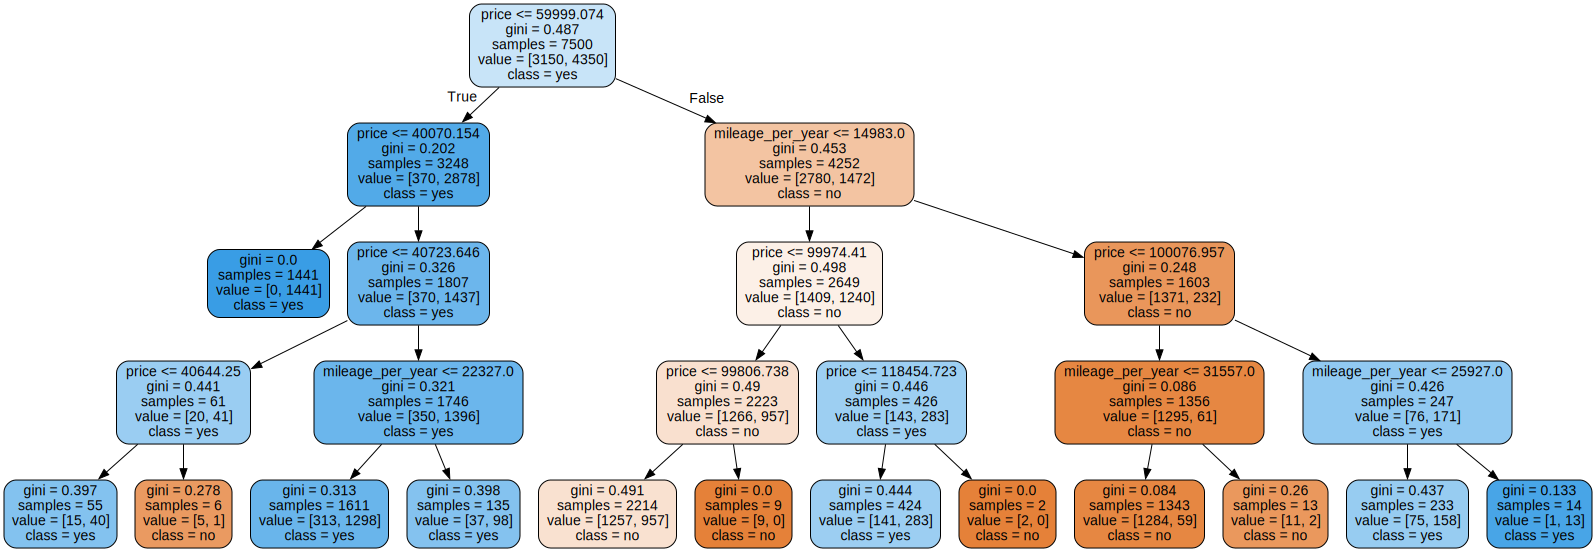

In [38]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modelo, out_file=None, feature_names=features, filled=True, rounded=True,class_names=['no','yes'])
grafico = graphviz.Source(dot_data)
grafico